# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
directory_path = r"d:\semester 4\machine learning\olivetti_faces.npy"
print(os.listdir(directory_path))

['olivetti_faces.npy', 'olivetti_faces_target.npy']


# Import Data

## Review Data

In [2]:
pics = np.load(r"d:\semester 4\machine learning\dataset progect\X.npy")
labels = np.load(r"d:\semester 4\machine learning\dataset progect\Y.npy")
print("pics: ", pics.shape)
print("labels: ", labels.shape)

pics:  (4000, 250, 250, 1)
labels:  (4000, 10)


In [3]:
print("There are {} images in the dataset".format(len(pics)))
print("There are {} unique targets in the dataset".format(len(np.unique(labels))))
print("Size of each image is {}x{}".format(pics.shape[1],pics.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(pics[0][0,:4]))

There are 4000 images in the dataset
There are 106 unique targets in the dataset
Size of each image is 250x250
Pixel values were scaled to [0,1] interval. e.g:[[241]
 [243]
 [245]
 [242]]


In [4]:
print("unique target number:",np.unique(labels))

unique target number: [ 80  81  85  86  87  88  89  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 191]


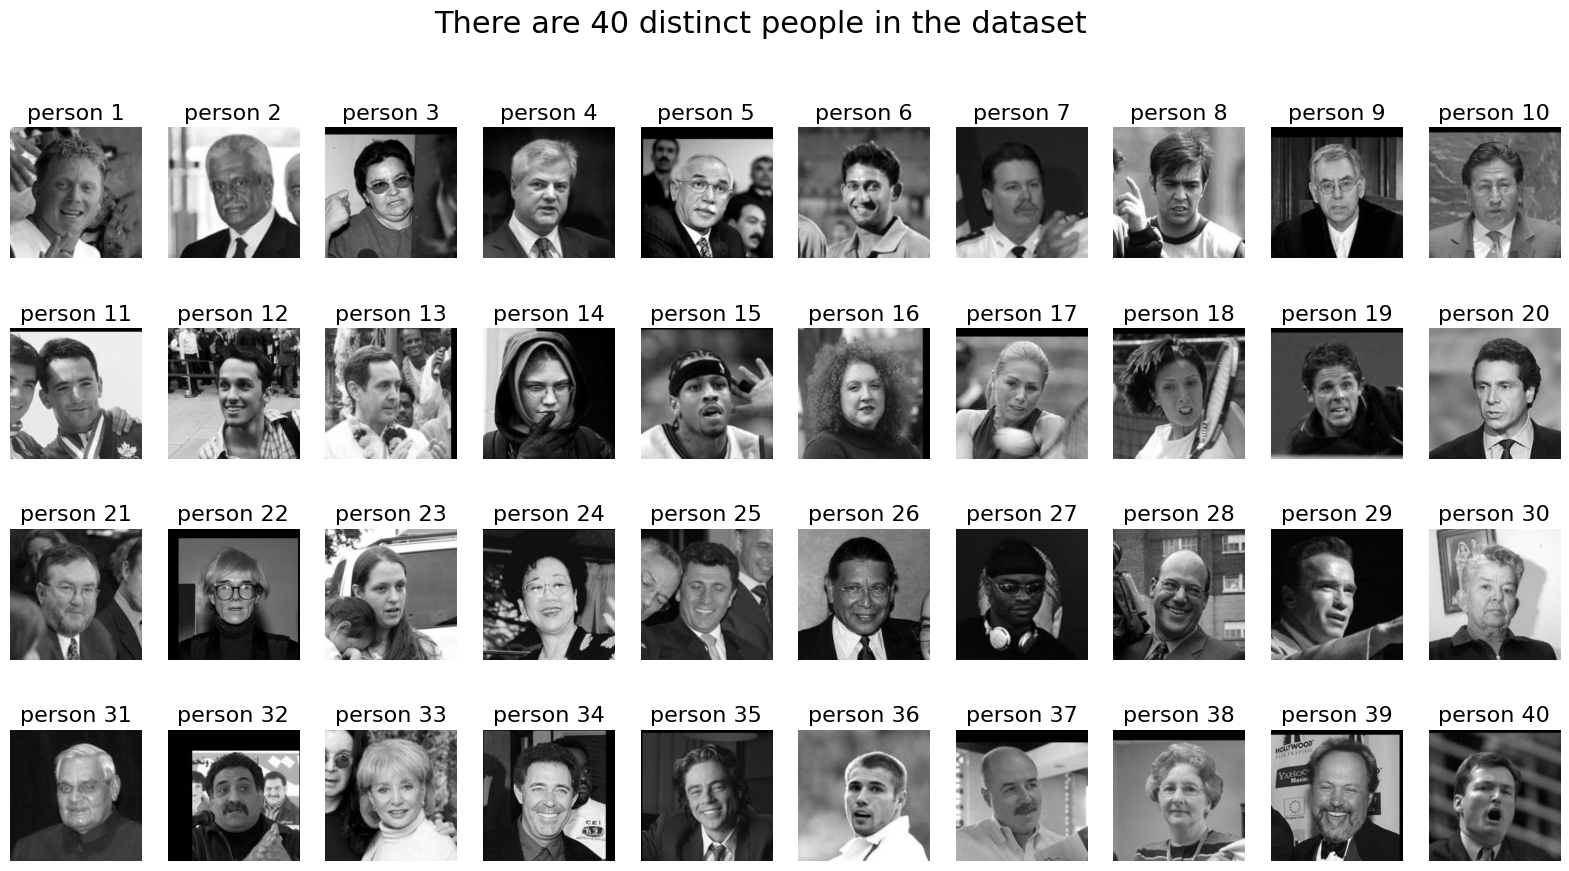

In [5]:
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()


In [7]:
Xdata = pics.reshape(pics.shape[0], -1) # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata
assert pics.shape[0] == labels.shape[0], "Number of samples in pics and labels do not match."
# Check the shapes of pics and labels
print("pics shape:", pics.shape)
print("labels shape:", labels.shape)


pics shape: (4000, 250, 250, 1)
labels shape: (4000, 10)


## Split data for train and test purposes

In [8]:
from sklearn.model_selection import train_test_split

Xdata = pics.reshape(pics.shape[0], -1)  # Reshape images
Ydata = labels

x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=46)


# Print shapes to debug
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

import numpy as np

# Convert one-hot encoded labels to integer labels
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Verify the shapes after conversion
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train:  (3200, 62500)
x_test:  (800, 62500)
y_train:  (3200, 10)
y_test:  (800, 10)
y_train shape: (3200,)
y_test shape: (800,)


### Reshape

In [9]:
# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Print the shapes
print("x_train: ", x_train_flat.shape)
print("x_test: ", x_test_flat.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


x_train:  (3200, 62500)
x_test:  (800, 62500)
y_train:  (3200,)
y_test:  (800,)


In [10]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

LR_accuracy is % 81.25


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

RF_accuracy is % 81.38


# K-NN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

Knn_accuracy is % 53.87


SVM 

In [11]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Define parameter distributions for RandomizedSearchCV, focusing on linear kernel
param_dist = {
    'C': uniform(0.1, 1000)
}

# Initialize RandomizedSearchCV with the SVM model and linear kernel
svm_random = RandomizedSearchCV(SVC(kernel='linear'), param_distributions=param_dist, n_iter=1, cv=2, scoring='accuracy', verbose=2, random_state=42)

# Fit the model to the training data
svm_random.fit(x_train, y_train.ravel())

# Display the best parameters found by RandomizedSearchCV
print("Best Parameters:", svm_random.best_params_)

# Use the best estimator to make predictions
svm_best = svm_random.best_estimator_

# Perform cross-validation on the training set
cross_val_scores = cross_val_score(svm_best, x_train, y_train.ravel(), cv=2, scoring='accuracy')

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END ................................C=374.6401188473625; total time= 7.9min
[CV] END ................................C=374.6401188473625; total time= 4.2min
Best Parameters: {'C': 374.6401188473625}


In [12]:

print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", np.mean(cross_val_scores))

# Predict on the test set
y_pred = svm_best.predict(x_test)

# Evaluate the model
print("Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))





Cross-validation scores: [0.796875 0.799375]
Mean cross-validation score: 0.798125
Model Evaluation:
Accuracy Score: 0.8025
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         6
           7       0.85      0.86      0.85       494
           8       0.17      0.06      0.09        16
           9       0.75      0.77      0.76       284

    accuracy                           0.80       800
   macro avg       0.44      0.42      0.43       800
weighted avg       0.79      0.80      0.80       800

Confusion Matrix:
[[  0   3   0   3]
 [  0 423   5  66]
 [  1  11   1   3]
 [  4  62   0 218]]


Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train Naive Bayes classifier
nb = GaussianNB()
nb.fit(x_train, y_train)

# Calculate accuracy
nb_accuracy = round(nb.score(x_test, y_test) * 100, 2)
print("Naive Bayes accuracy is %", nb_accuracy)

# Append accuracy to the lists for comparison
list_names.append("Naive Bayes")
list_accuracy.append(nb_accuracy)


Naive Bayes accuracy is % 43.5


# Comparison of the Learning Methods

In [19]:
df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,SVM rbf,90.00
1,SVM poly,96.25
2,SVM linear,97.50
